In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

In [3]:
%matplotlib qt
plt.imshow(image)

(-0.5, 1258.5, 706.5, -0.5)

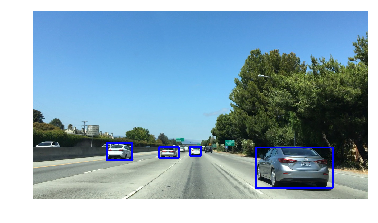

In [11]:
# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    for bb in bboxes:
        cv2.rectangle(draw_img, bb[0], bb[1], color=color, thickness = thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes
# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((837, 514), (1126, 666)), 
          ((278, 497), (372, 562)),
          ((474, 511), (547, 552)),
          ((590, 511), (631,545))]

result = draw_boxes(image, bboxes)
%matplotlib inline
plt.imshow(result)
plt.axis('off')

## Histograms of Color

In [23]:
import matplotlib.image as mpimg
import numpy as np
image = mpimg.imread('./cutouts/cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

In [26]:
# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1] /2 + bin_edges[0:len(bin_edges)-1])

Text(0.5,1,'B Histogram')

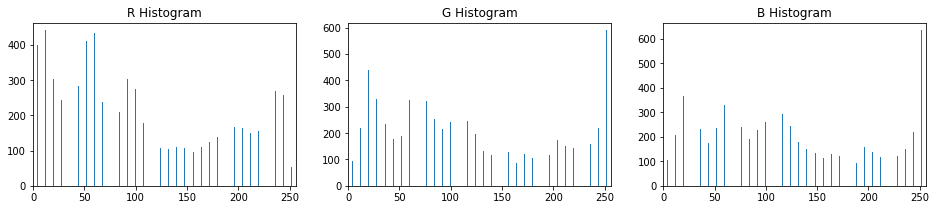

In [30]:
# Plot a figure with all three bar charts
%matplotlib inline
fig = plt.figure(figsize=(16,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

In [32]:
def rgb_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
def hls_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    lhist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    shist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = hhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hhist, lhist, shist, bin_centers, hist_features

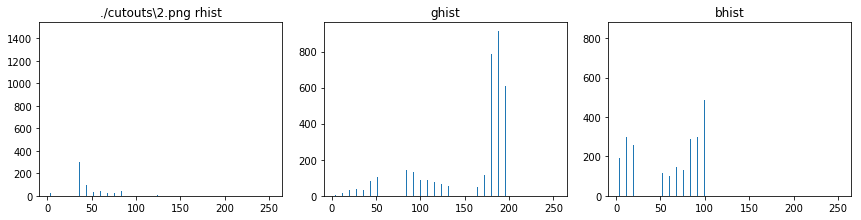

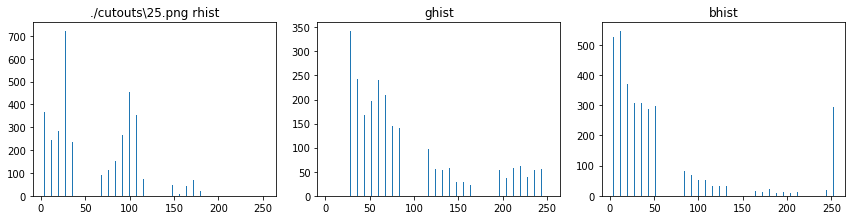

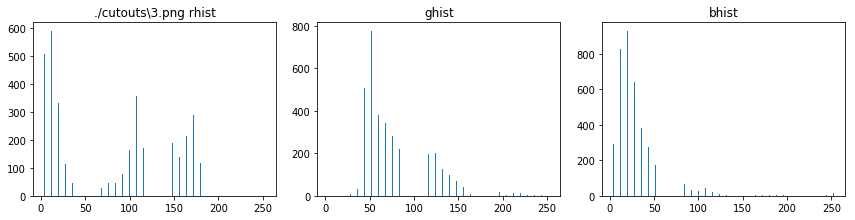

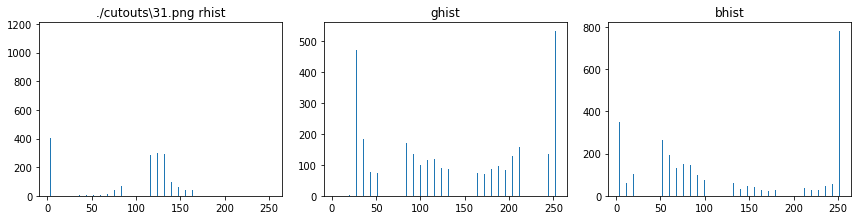

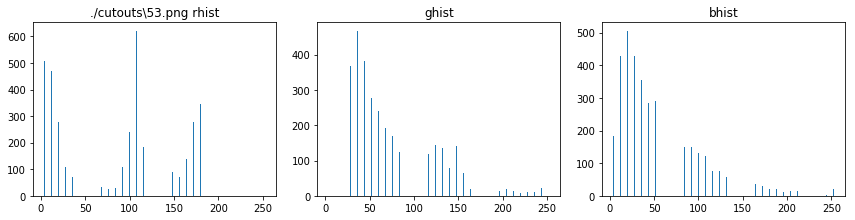

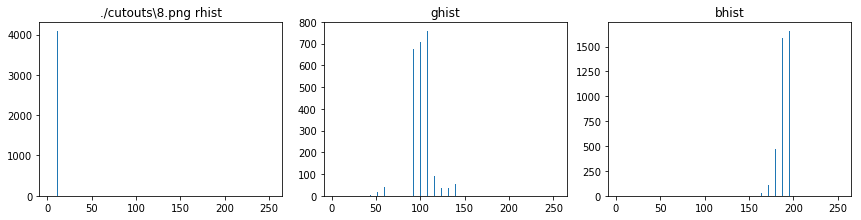

In [71]:
import glob
images = glob.glob('./cutouts/*.png')
for img_name in images:
#     img = mpimg.imread(img_name)
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Take histograms in R, G, and B
    num_bins = 32
    bin_range = (0, 256)
    rhist, ghist, bhist, rgb_bin_centers, rgb_hist_features = rgb_hist(img, num_bins, bin_range)
    hhist, lhist, shist, hls_bin_centers, hls_hist_features = hls_hist(img, num_bins, bin_range)
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 3))
    f.tight_layout()
    ax1.bar(hls_bin_centers, hhist[0])
#     ax1.xlim(0, 256)
    ax1.set_title(img_name + ' rhist', fontsize=12)
    ax2.bar(hls_bin_centers, lhist[0])
    ax2.set_title('ghist', fontsize=12)
#     ax2.xlim(0, 256)
    ax3.bar(hls_bin_centers,shist[0])
    ax3.set_title('bhist', fontsize=12)
#     ax3.xlim(0, 256)

Text(0.5,1,'Spatially Binned Features')

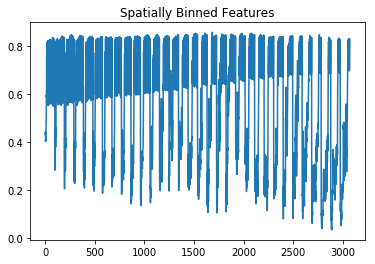

In [73]:
# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# KEEP IN MIND IF YOU DECIDE TO USE THIS FUNCTION LATER
# IN YOUR PROJECT THAT IF YOU READ THE IMAGE WITH 
# cv2.imread() INSTEAD YOU START WITH BGR COLOR!
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() # Remove this line!
    # Return the feature vector
    return features
    
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

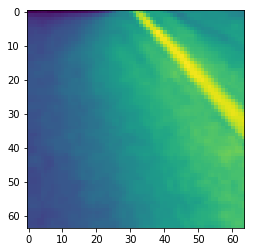

In [72]:
plt.imshow(img[:,:,0])

In [56]:
rhist = np.histogram(img[:,:,0], bins=32, range=(0,256))

In [57]:
rhist

(array([4096,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int64),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.]))

In [75]:
from skimage.feature import hog
pix_per_cell = 8
cell_per_block = 2
orient = 9

hog_features, hog_image = hog(img[:,:,0], orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

In [80]:
hog_ravel = hog_features.ravel()

In [82]:
hog_ravel.shape

(1764,)